<a href="https://colab.research.google.com/github/hbp5181/Linear-Model-uisng-homolog-survey-data/blob/main/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

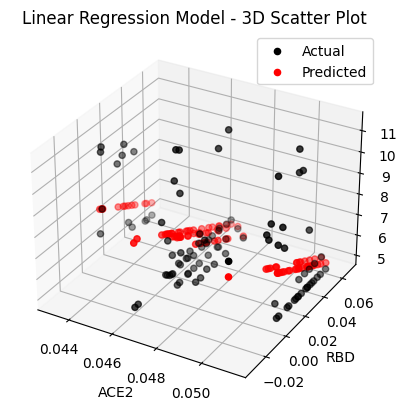

Mean Squared Error: 3.6092202995700755


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
data = pd.read_csv('/content/future learn data num.csv')
data[['ACE2', 'RBD']] = data[['ACE2', 'RBD']].apply(lambda x: x.str.split(',').str[0].astype(float))



# Extract X and Y values
X = data[['ACE2', 'RBD']]
y = data['Score']

# Concatenate 'ACE2' and 'RBD' columns to form a 2x6 matrix
X_matrix = pd.concat([X['ACE2'], X['RBD']], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_matrix, y, test_size=0.2, random_state=42)

# Create and train the linear model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the results in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual values
ax.scatter(X_test['ACE2'], X_test['RBD'], y_test, color='black', label='Actual')

# Scatter plot for predicted values
ax.scatter(X_test['ACE2'], X_test['RBD'], y_pred, color='red', label='Predicted')

ax.set_xlabel('ACE2')
ax.set_ylabel('RBD')
ax.set_zlabel('Score')
ax.set_title('Linear Regression Model - 3D Scatter Plot')
ax.legend()

plt.show()
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.6147001378164827


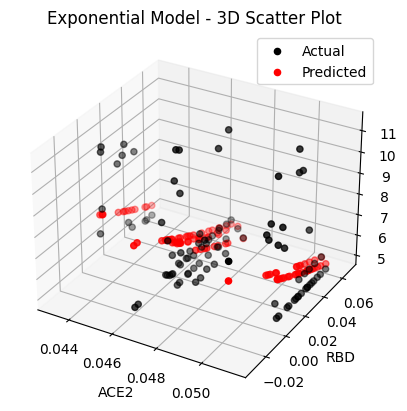

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_matrix, y, test_size=0.2, random_state=42)

# Log-transform the Y values
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Create and train the linear model on log-transformed Y values
model = LinearRegression()
model.fit(X_train, y_train_log)

# Make predictions on the test set
y_pred_log = model.predict(X_test)

# Convert the predicted log-transformed values back to the original scale
y_pred = np.exp(y_pred_log)

# Evaluate the model on the original scale
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the results in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual values
ax.scatter(X_test['ACE2'], X_test['RBD'], y_test, color='black', label='Actual')

# Scatter plot for predicted values
ax.scatter(X_test['ACE2'], X_test['RBD'], y_pred, color='red', label='Predicted')

ax.set_xlabel('ACE2')
ax.set_ylabel('RBD')
ax.set_zlabel('Score')
ax.set_title('Exponential Model - 3D Scatter Plot')
ax.legend()

plt.show()

Mean Squared Error: 2.9427817560901453


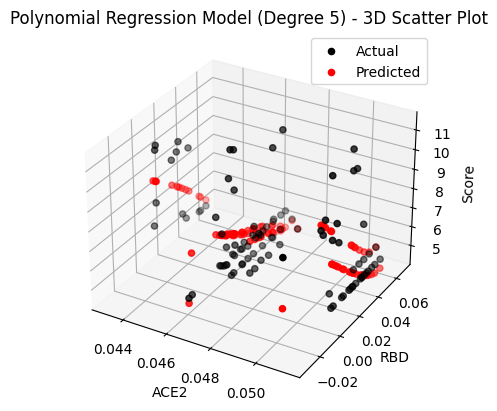

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Concatenate 'ACE2' and 'RBD' columns to form a 2x6 matrix
X_matrix = pd.concat([X['ACE2'], X['RBD']], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_matrix, y, test_size=0.2, random_state=42)

# Define the degree of the polynomial (e.g., degree=2 for quadratic)
degree = 2

# Generate polynomial features
degree=5
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train the linear model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the results in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual values
ax.scatter(X_test['ACE2'], X_test['RBD'], y_test, color='black', label='Actual')

# Scatter plot for predicted values
ax.scatter(X_test['ACE2'], X_test['RBD'], y_pred, color='red', label='Predicted')

ax.set_xlabel('ACE2')
ax.set_ylabel('RBD')
ax.set_zlabel('Score')
ax.set_title(f'Polynomial Regression Model (Degree {degree}) - 3D Scatter Plot')
ax.legend()

plt.show()